<a href="https://colab.research.google.com/github/TipsyPanda/ComplexBridges/blob/main/ComplexBridge_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

# Paths
DATA_DIR = "/content/drive/MyDrive/ComplexBridge_work/Data/"


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read in the dataset
url = "https://github.com/TipsyPanda/ComplexBridges/raw/main/ipmb_5sensors_30min_1_to_10hz.csv"
bridgeData = pd.read_csv(url)

In [5]:
# Look at the first rows of the dataset
bridgeData.head()

,timestamp,bridge_id,span_id,sensor_id,sensor_type,value,unit,traffic_load_proxy,rule_threshold,anomaly,anomaly_type
0,2025-10-10T12:00:00,BRIDGE_A01,SPAN_1,SG_001,strain_gauge,118.571847,microstrain,0.5,200.00,0,NaN
1,2025-10-10T12:00:00,BRIDGE_A01,SPAN_2,SG_002,strain_gauge,128.986727,microstrain,0.5,200.00,0,NaN
2,2025-10-10T12:00:00,BRIDGE_A01,SPAN_1,ACC_101,accelerometer_rms,0.020849,g,0.5,0.05,0,NaN
3,2025-10-10T12:00:00,BRIDGE_A01,SPAN_2,ACC_102,accelerometer_rms,0.015481,g,0.5,0.05,0,NaN
4,2025-10-10T12:00:00,BRIDGE_A01,SPAN_2,TMP_201,temperature,21.884280,C,0.5,35.00,0,NaN


In [6]:
# Summary of the dataset
bridgeData.info()

# Frequency of each sensor type
bridgeData['sensor_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           90000 non-null  object 
 1   bridge_id           90000 non-null  object 
 2   span_id             90000 non-null  object 
 3   sensor_id           90000 non-null  object 
 4   sensor_type         90000 non-null  object 
 5   value               90000 non-null  float64
 6   unit                90000 non-null  object 
 7   traffic_load_proxy  90000 non-null  float64
 8   rule_threshold      90000 non-null  float64
 9   anomaly             90000 non-null  int64  
 10  anomaly_type        3852 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 7.6+ MB


,count
sensor_type,
strain_gauge,36000
accelerometer_rms,36000
temperature,18000


In [7]:
#Number of missing entries per column
bridgeData.isna().sum()
#only empty values in anomaly type since it only shows if there is an anomaly

,0
timestamp,0
bridge_id,0
span_id,0
sensor_id,0
sensor_type,0
value,0
unit,0
traffic_load_proxy,0
rule_threshold,0
anomaly,0


In [8]:
# Statistical summary of all numeric columns in the dataset
bridgeData.describe()

,value,traffic_load_proxy,rule_threshold,anomaly
count,90000.000000,90000.000000,90000.000000,90000.000000
mean,60.327781,0.500000,87.020000,0.042800
std,68.617340,0.353593,93.126886,0.202407
min,0.004077,0.000000,0.050000,0.000000
25%,0.021788,0.146000,0.050000,0.000000
50%,22.029184,0.500000,35.000000,0.000000
75%,123.721347,0.854000,200.000000,0.000000
max,286.421924,1.000000,200.000000,1.000000


In [9]:
#Statistical summary of the "value" per "sensor_type"
bridgeData.groupby('sensor_type')['value'].describe()

,count,mean,std,min,25%,50%,75%,max
sensor_type,,,,,,,,
accelerometer_rms,36000.0,0.021058,0.009373,0.004077,0.016588,0.020059,0.023609,0.101841
strain_gauge,36000.0,139.295070,34.596890,103.439485,121.304125,126.163869,134.024581,286.421924
temperature,18000.0,23.006651,3.046133,21.255939,21.881168,22.029184,22.195111,34.640107


In [10]:
#Statistical summary of value per sensor_id
bridgeData.groupby(['sensor_id'])['value'].describe()

,count,mean,std,min,25%,50%,75%,max
sensor_id,,,,,,,,
ACC_101,18000.0,0.021343,0.010469,0.004077,0.016584,0.020067,0.023626,0.101841
ACC_102,18000.0,0.020773,0.008122,0.004201,0.016593,0.020051,0.023581,0.093898
SG_001,18000.0,149.023253,43.694536,103.701213,122.001249,127.610315,160.099800,286.421924
SG_002,18000.0,129.566887,17.188891,103.439485,120.699590,125.065082,130.503170,217.411624
TMP_201,18000.0,23.006651,3.046133,21.255939,21.881168,22.029184,22.195111,34.640107


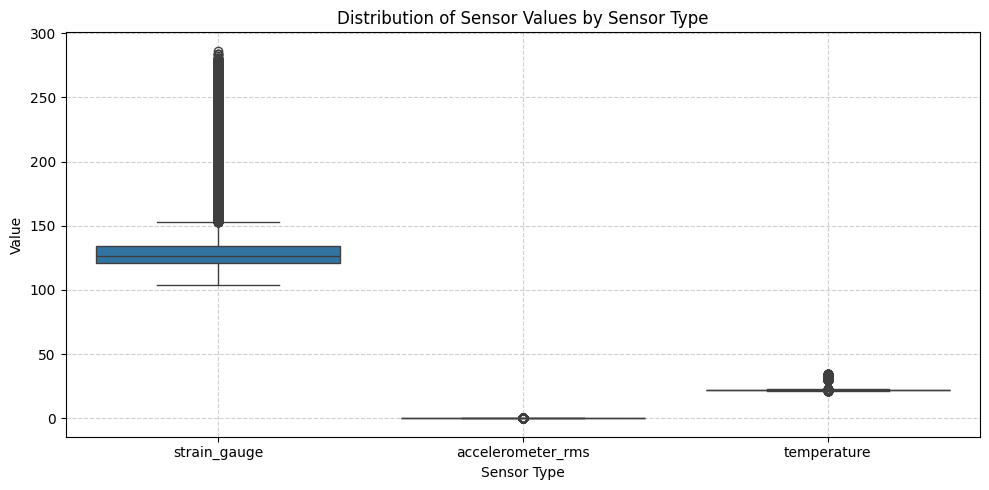

In [11]:
#Box plot of “value” per sensor_type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x='sensor_type', y='value', data=bridgeData)
plt.title("Distribution of Sensor Values by Sensor Type")
plt.xlabel("Sensor Type")
plt.ylabel("Value")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [12]:
#Convert timestamps from text to a datetime format
bridgeData['timestamp'] = pd.to_datetime(bridgeData['timestamp'], format='ISO8601')

#Use timestamps as the main index (add lables 1, 2, 3, ...)
bridgeData.set_index('timestamp', inplace=True)


In [13]:
bridgeData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90000 entries, 2025-10-10 12:00:00 to 2025-10-10 12:29:59.900000
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bridge_id           90000 non-null  object 
 1   span_id             90000 non-null  object 
 2   sensor_id           90000 non-null  object 
 3   sensor_type         90000 non-null  object 
 4   value               90000 non-null  float64
 5   unit                90000 non-null  object 
 6   traffic_load_proxy  90000 non-null  float64
 7   rule_threshold      90000 non-null  float64
 8   anomaly             90000 non-null  int64  
 9   anomaly_type        3852 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


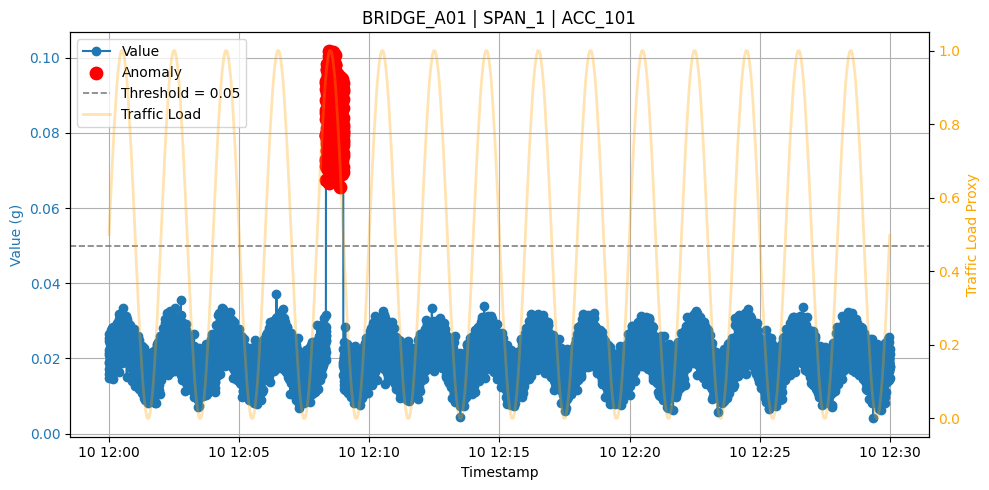

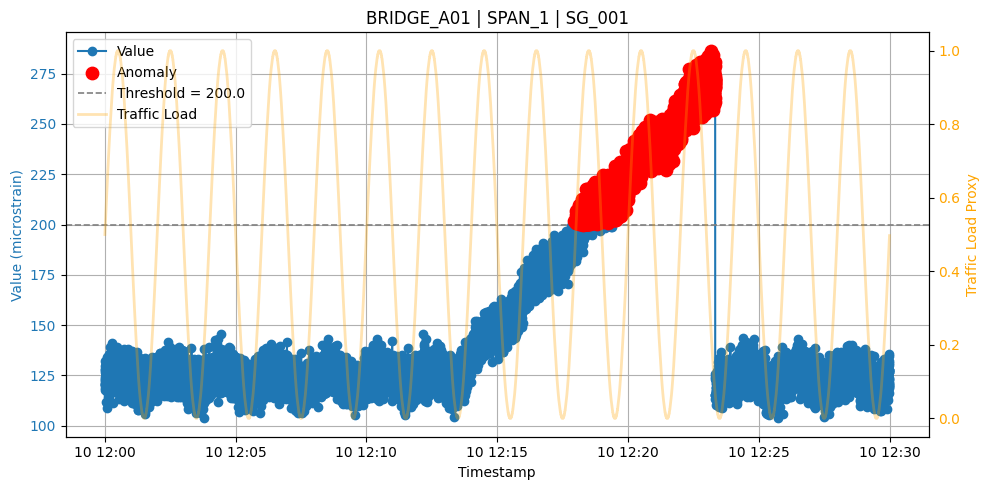

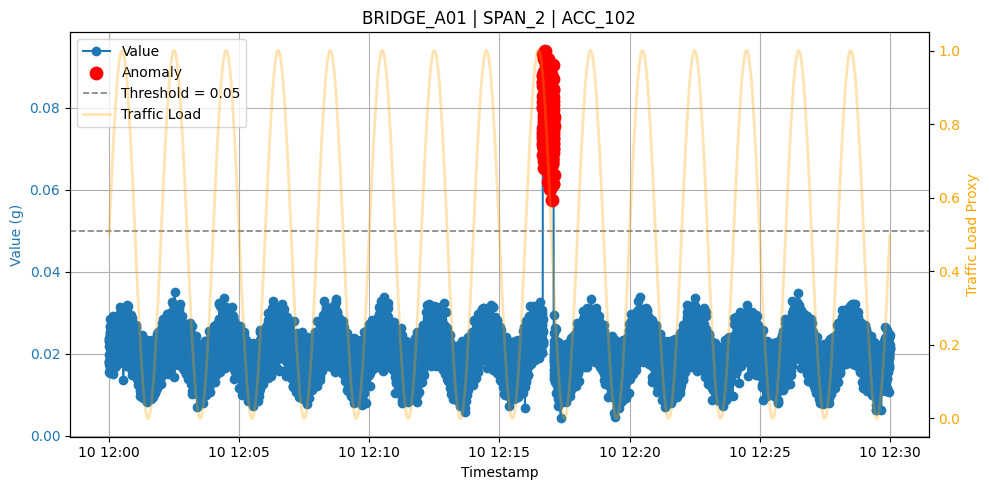

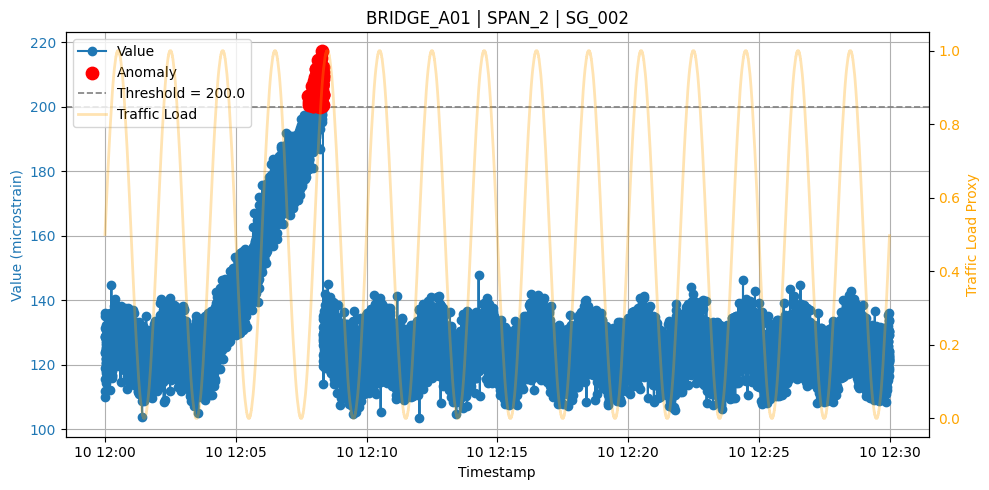

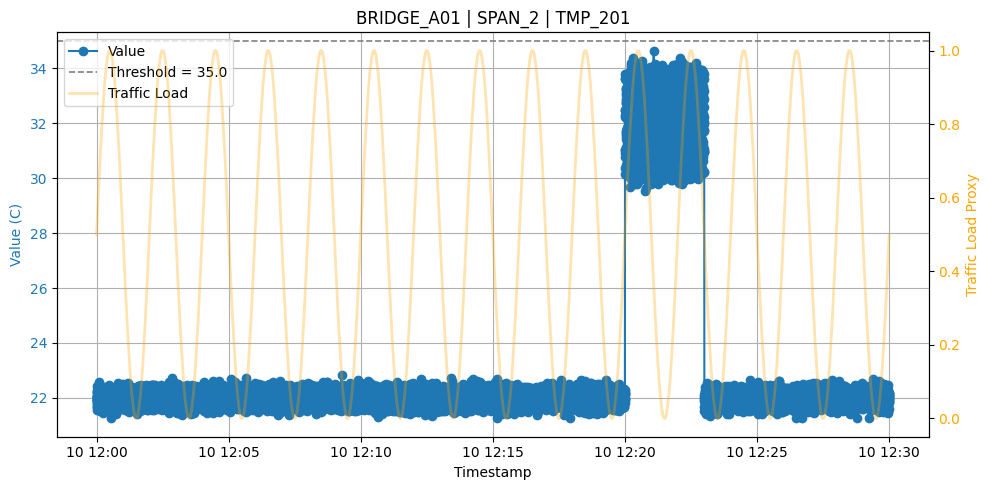

In [14]:
# Ensure anomaly is numeric (0/1)
bridgeData['anomaly'] = pd.to_numeric(bridgeData['anomaly'], errors='coerce').fillna(0).astype(int)

# Group the data by asset location and sensor
grouped = bridgeData.groupby(['bridge_id', 'span_id','sensor_id'])

# Loop through groups and prep subsets
for (bridge, span, sensor), group in grouped:
    group = group.sort_index()
    normal = group[group['anomaly'] == 0]
    anoms  = group[group['anomaly'] == 1]

    #Create a figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # --- Left y-axis: Sensor value ---
    ax1.plot(group.index, group['value'], marker='o', label='Value', color='tab:blue')
    if not anoms.empty:
        ax1.scatter(anoms.index, anoms['value'], s=80, c='red', label='Anomaly', zorder=3)

    # Threshold line
    if group['rule_threshold'].nunique() == 1:
        thr = group['rule_threshold'].iloc[0]
        ax1.axhline(thr, linestyle='--', linewidth=1.2, color='gray', label=f'Threshold = {thr}')
    else:
        ax1.plot(group.index, group['rule_threshold'], linestyle='--', linewidth=1.2, color='gray', label='Threshold')

    ax1.set_xlabel("Timestamp")
    ax1.set_ylabel(f"Value ({group['unit'].iloc[0]})", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # --- Right y-axis: Traffic load proxy ---
    ax2 = ax1.twinx()
    ax2.plot(group.index, group['traffic_load_proxy'], color='orange', alpha=0.3, linewidth=2, label='Traffic Load')
    ax2.set_ylabel("Traffic Load Proxy", color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # --- Titles & Legend ---
    plt.title(f"{bridge} | {span} | {sensor}")
    ax1.grid(True)
    fig.tight_layout()

    # Combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()

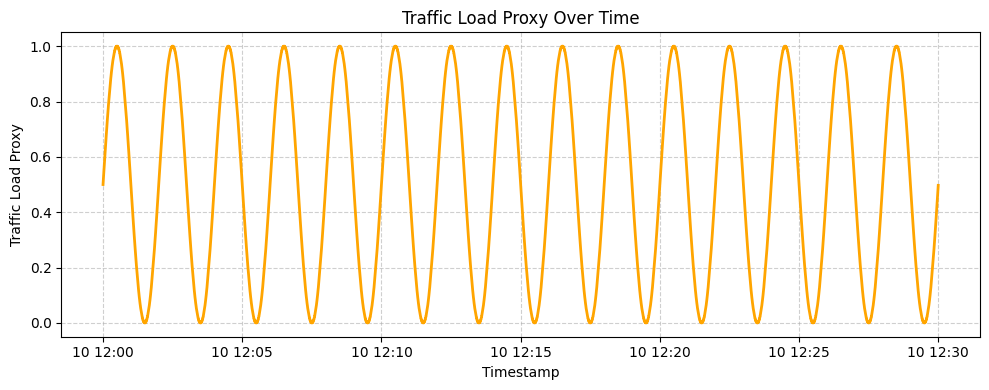

In [15]:
#visualization of how the bridge’s simulated traffic load changes over time
plt.figure(figsize=(10, 4))
plt.plot(bridgeData.index, bridgeData['traffic_load_proxy'], color='orange', linewidth=2)

plt.title("Traffic Load Proxy Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Traffic Load Proxy")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

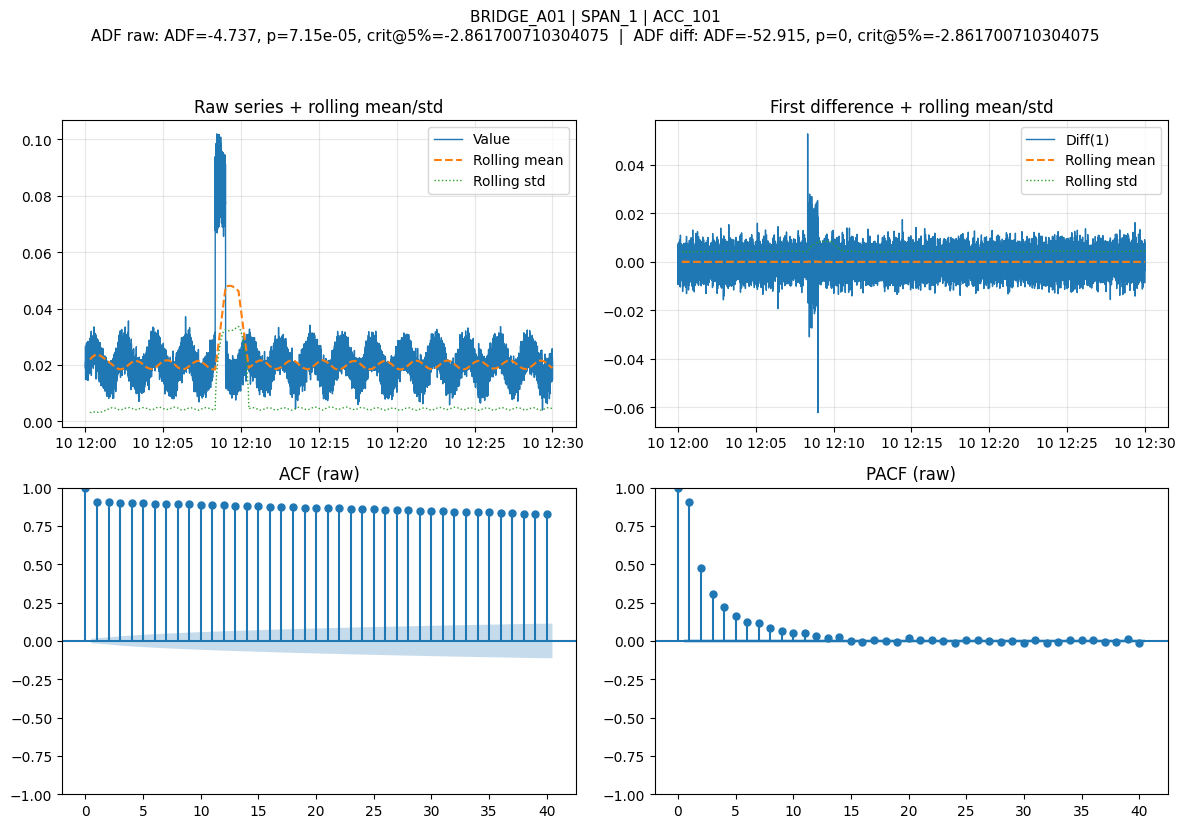

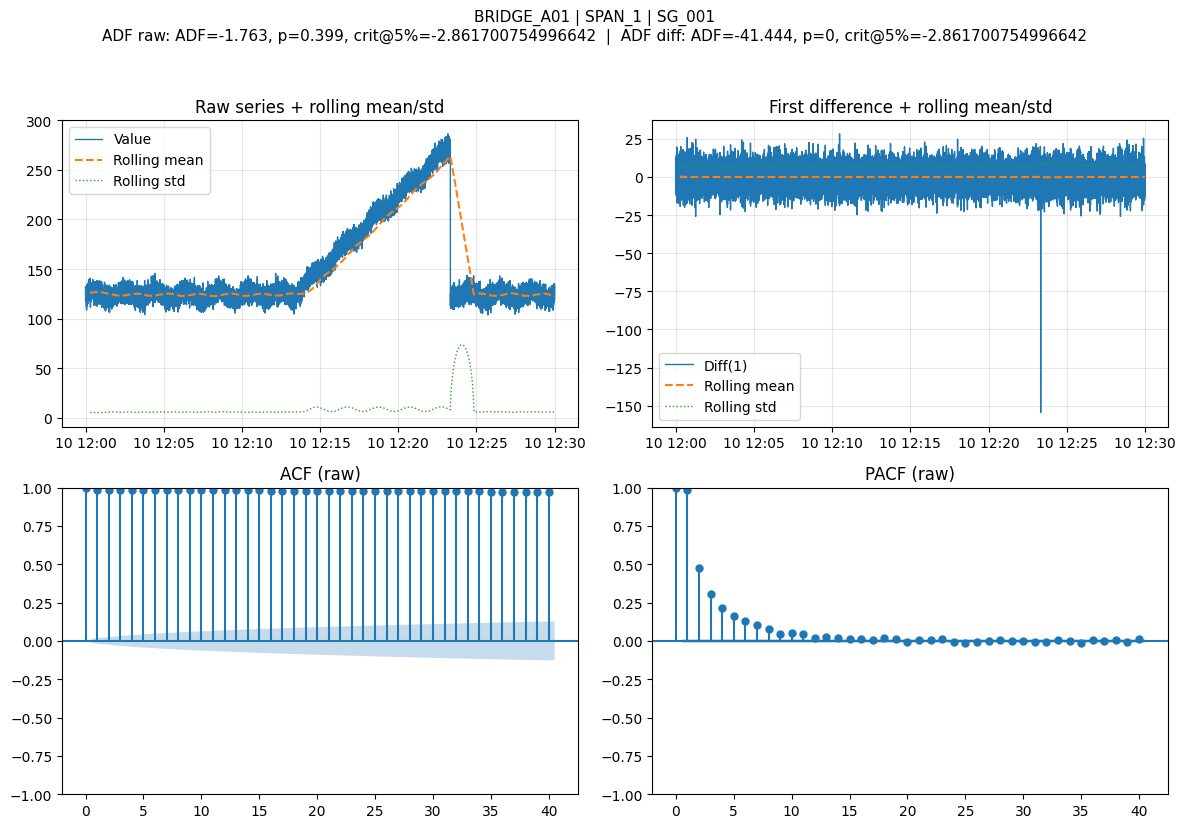

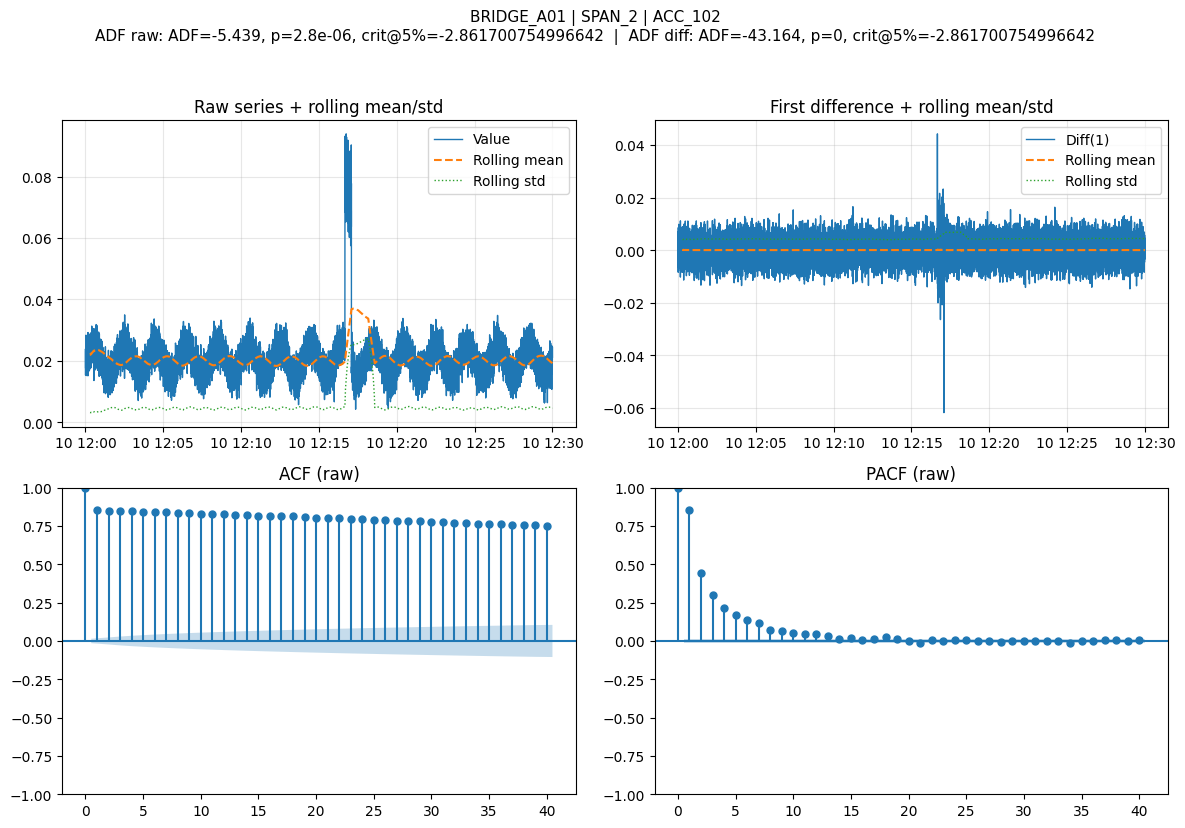

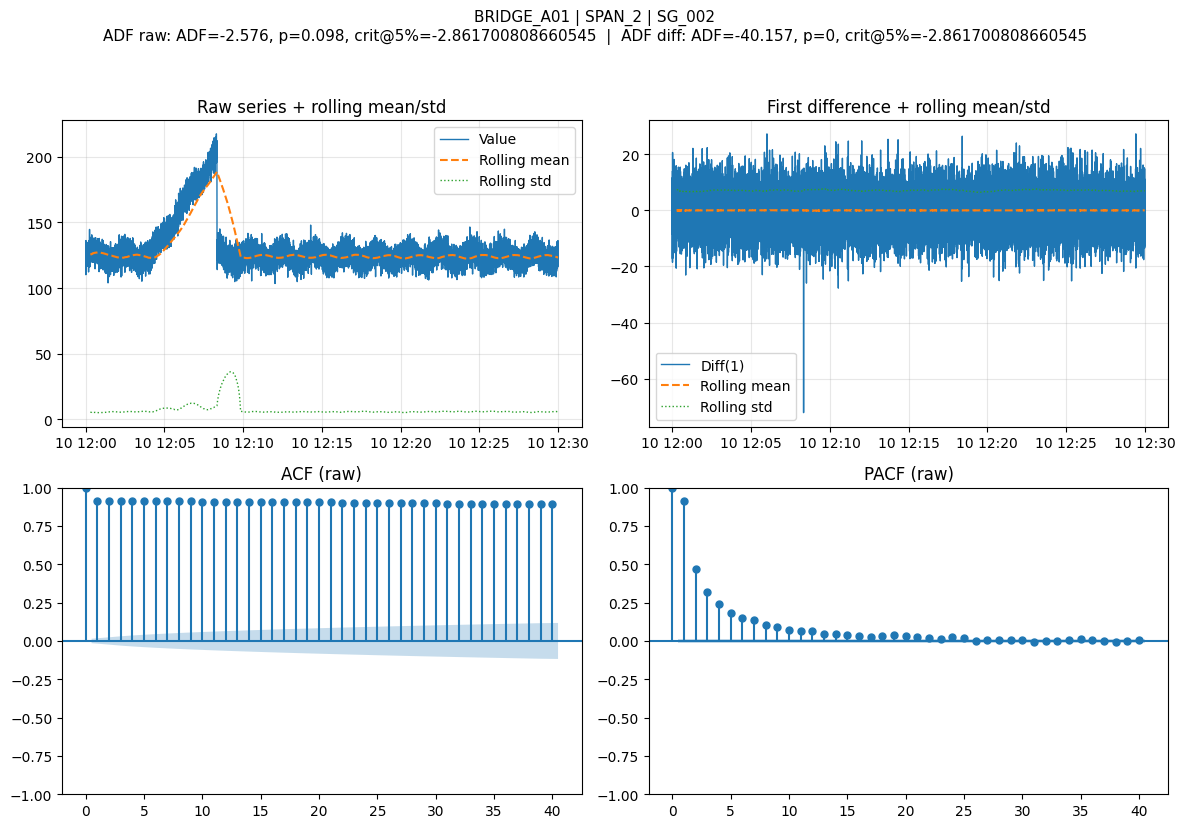

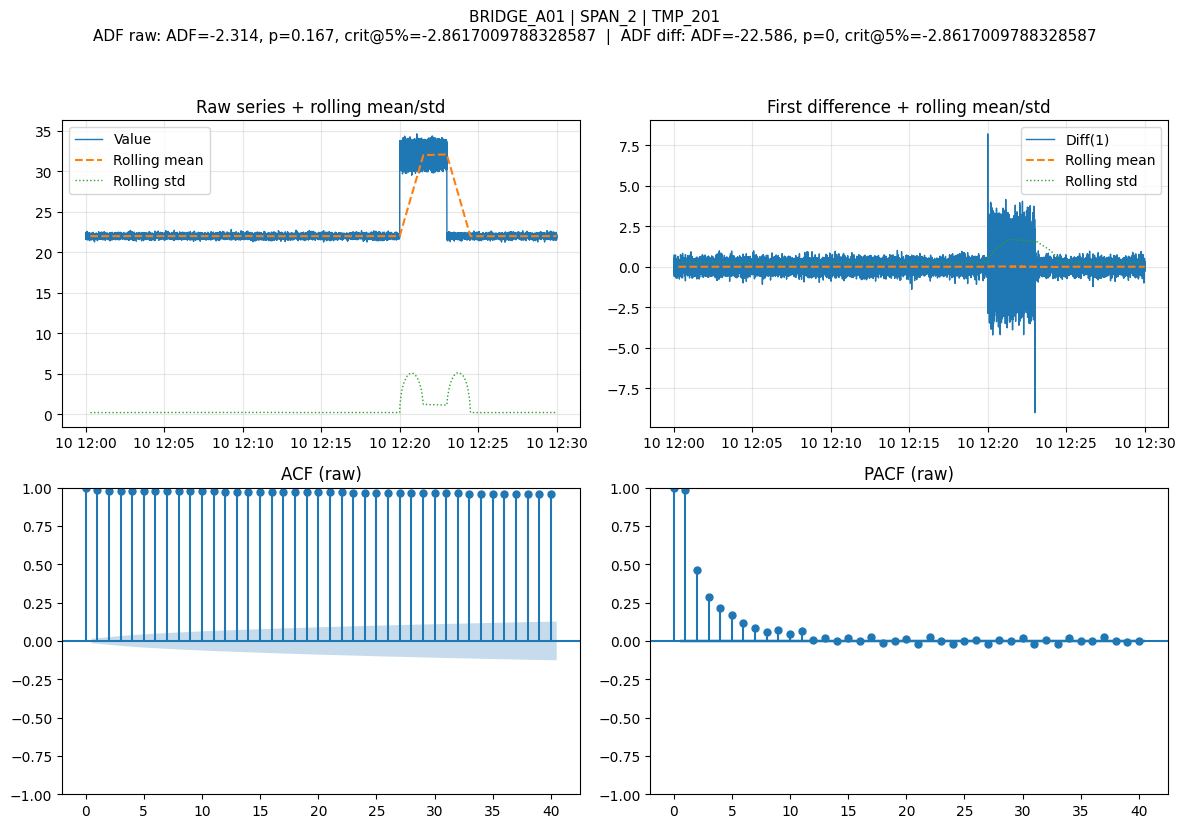

In [16]:
# ---- Imports ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ---- Helper: ADF pretty printer ----
def adf_summary(x):
    x = pd.Series(x).dropna()
    if len(x) < 10:
        return {"ok": False, "note": "Too few points (<10) for ADF"}
    try:
        adf_stat, pval, usedlag, nobs, crit, icbest = adfuller(x, autolag='AIC')
        return {
            "ok": True,
            "adf_stat": adf_stat,
            "pval": pval,
            "crit": crit
        }
    except Exception as e:
        return {"ok": False, "note": f"ADF error: {e}"}

# ---- Main plotting function per group ----
def plot_stationarity_per_sensor(bridgeData, group_cols=('bridge_id','span_id','sensor_id'),
                                 value_col='value', min_points=50, lags=40):
    """
    Creates a 2x2 diagnostic plot per sensor_id group:
    (1) raw with rolling mean/std, (2) 1st difference with rolling mean/std, (3) ACF, (4) PACF.
    Adds ADF test results for raw and diff series to the suptitle.
    Assumes DatetimeIndex; sorts index per group. Skips tiny groups.
    """
    grouped = bridgeData.groupby(list(group_cols))
    for keys, g in grouped:
        g = g.sort_index()
        s = g[value_col].astype(float).dropna()
        if not isinstance(g.index, pd.DatetimeIndex):
            # If index isn't time, try to coerce from a timestamp column if present
            # (comment this out if your index is already a DatetimeIndex)
            if 'timestamp' in g.columns:
                g = g.set_index(pd.to_datetime(g['timestamp']))
                g = g.sort_index()
                s = g[value_col].astype(float).dropna()
        if s.size < min_points:
            continue  # skip very short series

        # Choose a reasonable rolling window (5% of length, at least 20)
        win = max(20, int(len(s) * 0.05))

        # Raw rolling stats
        roll_mean = s.rolling(win, min_periods=max(5, win//5)).mean()
        roll_std  = s.rolling(win, min_periods=max(5, win//5)).std()

        # First difference
        d1 = s.diff().dropna()
        d1_roll_mean = d1.rolling(win, min_periods=max(5, win//5)).mean()
        d1_roll_std  = d1.rolling(win, min_periods=max(5, win//5)).std()

        # ADF tests
        adf_raw = adf_summary(s)
        adf_d1  = adf_summary(d1)

        # ---- Plot ----
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        ax_ts, ax_diff, ax_acf, ax_pacf = axes.ravel()

        # (1) Raw with rolling mean/std
        ax_ts.plot(s.index, s.values, lw=1, label='Value')
        ax_ts.plot(roll_mean.index, roll_mean.values, lw=1.5, linestyle='--', label='Rolling mean')
        ax_ts.plot(roll_std.index, roll_std.values, lw=1.0, linestyle=':', label='Rolling std')
        ax_ts.set_title("Raw series + rolling mean/std")
        ax_ts.grid(True, alpha=0.3)
        ax_ts.legend(loc='best')

        # (2) First difference with rolling mean/std
        ax_diff.plot(d1.index, d1.values, lw=1, label='Diff(1)')
        ax_diff.plot(d1_roll_mean.index, d1_roll_mean.values, lw=1.5, linestyle='--', label='Rolling mean')
        ax_diff.plot(d1_roll_std.index, d1_roll_std.values, lw=1.0, linestyle=':', label='Rolling std')
        ax_diff.set_title("First difference + rolling mean/std")
        ax_diff.grid(True, alpha=0.3)
        ax_diff.legend(loc='best')

        # (3) ACF on raw (fallback to diff if raw too short)
        try:
            plot_acf(s.dropna(), ax=ax_acf, lags=min(lags, len(s)-2))
            ax_acf.set_title("ACF (raw)")
        except Exception:
            plot_acf(d1.dropna(), ax=ax_acf, lags=min(lags, len(d1)-2))
            ax_acf.set_title("ACF (diff)")

        # (4) PACF on raw (fallback to diff if needed)
        try:
            plot_pacf(s.dropna(), ax=ax_pacf, lags=min(lags, len(s)-2), method='ywm')
            ax_pacf.set_title("PACF (raw)")
        except Exception:
            plot_pacf(d1.dropna(), ax=ax_pacf, lags=min(lags, len(d1)-2), method='ywm')
            ax_pacf.set_title("PACF (diff)")

        # Suptitle with ADF summaries
        def fmt_adf(res):
            if not res.get("ok", False):
                return res.get("note", "n/a")
            return f"ADF={res['adf_stat']:.3f}, p={res['pval']:.3g}, crit@5%={res['crit'].get('5%', 'n/a')}"

        title_left = " | ".join(map(str, keys))
        title_right = f"ADF raw: {fmt_adf(adf_raw)}  |  ADF diff: {fmt_adf(adf_d1)}"
        fig.suptitle(f"{title_left}\n{title_right}", y=1.03, fontsize=11)

        fig.tight_layout()
        plt.show()

# ---- Call it on your DataFrame (assumes DatetimeIndex already set) ----
plot_stationarity_per_sensor(bridgeData)


In [17]:
# Look at the first rows of the dataset
bridgeData.head()

,bridge_id,span_id,sensor_id,sensor_type,value,unit,traffic_load_proxy,rule_threshold,anomaly,anomaly_type
timestamp,,,,,,,,,,
2025-10-10 12:00:00,BRIDGE_A01,SPAN_1,SG_001,strain_gauge,118.571847,microstrain,0.5,200.00,0,NaN
2025-10-10 12:00:00,BRIDGE_A01,SPAN_2,SG_002,strain_gauge,128.986727,microstrain,0.5,200.00,0,NaN
2025-10-10 12:00:00,BRIDGE_A01,SPAN_1,ACC_101,accelerometer_rms,0.020849,g,0.5,0.05,0,NaN
2025-10-10 12:00:00,BRIDGE_A01,SPAN_2,ACC_102,accelerometer_rms,0.015481,g,0.5,0.05,0,NaN
2025-10-10 12:00:00,BRIDGE_A01,SPAN_2,TMP_201,temperature,21.884280,C,0.5,35.00,0,NaN


In [18]:
#Save data to pickle to read in next notebook
bridgeData.to_pickle(DATA_DIR+"DF_BridgeData_cleaned.pkl")